# Lending Club Case Study by Durgesh Chaubey

In [2]:
# import required libraries 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
import datetime as dt
import warnings 
warnings.filterwarnings(action='ignore') #to ignore warnings
pd.set_option('display.max_columns', None) #to display all columns
pd.set_option('display.max_rows',None) #to display all rows

# 1 Data Cleaning
## 1.1 Dealing with null and unique values

As per problem statement (refer readme.md file) we have data for only those whose loan application is accepted. out of those we have to identify driving variables responsible for laon default. so in next cell is to read csv file and delete data of those loan applicant whose laon application is not accepted.

In [3]:
loan = pd.read_csv('C:/Users/dell/Desktop/loan.csv') # to read csv file
loan.shape

(39717, 111)

In [ ]:
loan.dropna(axis=1, how='all', inplace= True) # to drop columns with all null values
loan = loan.loc[:, loan.nunique().values!=1] # to take only those rows and columns which are not havinig unique values

In [3]:
#As we do not have to deal with those whose loan_status is Current i.e active, so take only those whose loan status is not current
loan = loan[loan.loan_status!='Current'] 

In [4]:
loan.shape

(38577, 48)

In [5]:
#to Check null and unique values in parallel
null_unique = pd.DataFrame()
null_unique['nulls'] = pd.Series(loan.isnull().sum())
null_unique['unique'] = pd.Series(loan.nunique())
null_unique

,nulls,unique
id,0,38577
member_id,0,38577
loan_amnt,0,870
funded_amnt,0,1019
funded_amnt_inv,0,8050
term,0,2
int_rate,0,370
installment,0,15022
grade,0,7
sub_grade,0,35


### As we can see 

id, member_id, emp_title, url, desc, title and zip_code have nothing significant to do with analysis.

mths_since_last_record has (35837/35877) 99.88% null values. it would not play significant roll in analisis

out_prncp and out_prncp_inv have all single unique values, hence none of use for analysis.

next_pymnt_d has all 38577 value as null, none of our use

total_pymnt,total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, collection_recovery_fee and last_pymnt_amnt have no significant role in pridiction for behaviour of borrower towards default, so these can be dropped.


Following columns are not usefull for analysis due to missing data in them
term, installment, sub_grade, issue_d, dti, earliest_cr_line, inq_last_6mths, pub_rec, revol_bal , revol_util , recoveries, last_credit_pull_d.


In [6]:
remove_col = ['id', 'member_id','emp_title', 'url', 'desc', 'title', 'zip_code', 'mths_since_last_record', 'out_prncp', 'out_prncp_inv','next_pymnt_d','total_pymnt','total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'collection_recovery_fee', 'last_pymnt_amnt','term','installment','sub_grade','issue_d','dti','earliest_cr_line','inq_last_6mths','pub_rec','revol_bal','revol_util','recoveries','last_credit_pull_d']
loan.drop(axis=1,labels=remove_col,inplace=True)

In [7]:
loan.shape

(38577, 18)

In [8]:
#to check loan status of borrower with mths_since_last_delinq parallel
apradhi = pd.DataFrame()
apradhi['Without Delinquency'] = pd.Series(loan[loan.mths_since_last_delinq.isna()]['loan_status'].value_counts())
apradhi['With Delinquency'] = pd.Series(loan[~loan.mths_since_last_delinq.isna()]['loan_status'].value_counts())
apradhi['With Delinquency 02 yr'] = pd.Series(loan[~loan.delinq_2yrs.isna()]['loan_status'].value_counts())

apradhi

,Without Delinquency,With Delinquency,With Delinquency 02 yr
Fully Paid,21420,11530,32950
Charged Off,3485,2142,5627


Following are the calculation from above table

(3485/21420) 16.26% of people have Charged Off there loan with no delinquency record.
(2142/11530) 18.57% have charged off there loan with delinquency record.
(5627/32950) 17.07% have charged off there loan with delinquency record of past 02 years

Hence, we could conclude Brrowers with delinquency records are more prone to default loan. 

In [9]:
#to print null and unique values in parallel
null_unique = pd.DataFrame()
null_unique['nulls'] = pd.Series(loan.isnull().sum())
null_unique['unique'] = pd.Series(loan.nunique())
print(null_unique)
print(loan.shape)

                        nulls  unique
loan_amnt                   0     870
funded_amnt                 0    1019
funded_amnt_inv             0    8050
int_rate                    0     370
grade                       0       7
emp_length               1033      11
home_ownership              0       5
annual_inc                  0    5215
verification_status         0       3
loan_status                 0       2
purpose                     0      14
addr_state                  0      50
delinq_2yrs                 0      11
mths_since_last_delinq  24905      95
open_acc                    0      40
total_acc                   0      82
last_pymnt_d               71     101
pub_rec_bankruptcies      697       3
(38577, 18)


In [10]:
#to check loan status of borrower with last_pymnt_d parallel
loan[loan.last_pymnt_d.isna()]['loan_status'].value_counts()

Charged Off    71
Name: loan_status, dtype: int64

Those borrowers who do not have any last payment dates are 100% defaulter. So they are all riskiest. 

In [13]:
loan.pub_rec_bankruptcies.value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [14]:
# here in 'pub_rec_bankruptcies' zero is refered as zero bankruptcies record, we could consider zero for those too whose record is not given in dataframe.
loan['pub_rec_bankruptcies'].fillna(value = 0, inplace=True)

## 1.2 Data extraction in required format

In [15]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,delinq_2yrs,mths_since_last_delinq,open_acc,total_acc,last_pymnt_d,pub_rec_bankruptcies
0,5000,5000,4975.0,10.65%,B,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,AZ,0,NaN,3,9,Jan-15,0.0
1,2500,2500,2500.0,15.27%,C,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,GA,0,NaN,3,4,Apr-13,0.0
2,2400,2400,2400.0,15.96%,C,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,IL,0,NaN,2,10,Jun-14,0.0
3,10000,10000,10000.0,13.49%,C,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,CA,0,35.0,10,37,Jan-15,0.0
5,5000,5000,5000.0,7.90%,A,3 years,RENT,36000.0,Source Verified,Fully Paid,wedding,AZ,0,NaN,9,12,Jan-15,0.0


In [16]:
loan['int_rate'] = loan['int_rate'].apply(lambda x: float(x[:-1])) # to remove % from 'int_rate' column
loan['emp_length'] = loan['emp_length'].apply(lambda x: str(x).rstrip(' years')) # to remove years from 'emp_length'
loan.rename(columns = {'emp_length' : 'exp_in_years'}, inplace= True) # changing 'emp_length' to 'exp_in_years'

In [17]:
#checking datatypes of all columns
datatp = pd.DataFrame()
datatp['Original DataTypes'] = pd.Series(loan.dtypes)
datatp.transpose()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,grade,exp_in_years,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,delinq_2yrs,mths_since_last_delinq,open_acc,total_acc,last_pymnt_d,pub_rec_bankruptcies
Original DataTypes,int64,int64,float64,float64,object,object,object,float64,object,object,object,object,int64,float64,int64,int64,object,float64


Some of the features have categorised variable (i.e. can be arranged in order). Converting the datatypes to categories.
Also few features shows date. Converting them to datetime category.

In [18]:
#Altering datatypes
category_col = ['grade', 'exp_in_years', 'home_ownership', 'verification_status', 'loan_status',
 'purpose', 'addr_state']
loan[category_col] = loan[category_col].astype('category')
datatp['Altered Datatypes'] = pd.Series(loan.dtypes)
datatp.transpose()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,grade,exp_in_years,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,delinq_2yrs,mths_since_last_delinq,open_acc,total_acc,last_pymnt_d,pub_rec_bankruptcies
Original DataTypes,int64,int64,float64,float64,object,object,object,float64,object,object,object,object,int64,float64,int64,int64,object,float64
Altered Datatypes,int64,int64,float64,float64,category,category,category,float64,category,category,category,category,int64,float64,int64,int64,object,float64


In [19]:
#below line code is commented as while runnig this jupyter notebook multiple times, excel is overrided again and again. this has nothing to with analysis. i have created it just to cross check graphs and plot with excel.

#loan.to_excel("C:/Users/dell/Desktop/new_excel.xlsx")# to pull out excel after cleaning # to extract excel after data cleaning

During SGC_ML_C34_CC_G05 session dated 04th Nov 2021, Evenning session on upgrad zoom, facilitator said reverse approach is better for EDA. i.e. first multyvariate, then Bivariate and then Univariate analysis. This was going on in industries these days. He also said pandas profiling is better approach for EDA analysis. here i am using reverse approach only as pandas profiling is not letting run code properly with pandas library.

# 2.0 Bivariate Analysis

In [20]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,grade,exp_in_years,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,delinq_2yrs,mths_since_last_delinq,open_acc,total_acc,last_pymnt_d,pub_rec_bankruptcies
0,5000,5000,4975.0,10.65,B,10+,RENT,24000.0,Verified,Fully Paid,credit_card,AZ,0,NaN,3,9,Jan-15,0.0
1,2500,2500,2500.0,15.27,C,< 1,RENT,30000.0,Source Verified,Charged Off,car,GA,0,NaN,3,4,Apr-13,0.0
2,2400,2400,2400.0,15.96,C,10+,RENT,12252.0,Not Verified,Fully Paid,small_business,IL,0,NaN,2,10,Jun-14,0.0
3,10000,10000,10000.0,13.49,C,10+,RENT,49200.0,Source Verified,Fully Paid,other,CA,0,35.0,10,37,Jan-15,0.0
5,5000,5000,5000.0,7.90,A,3,RENT,36000.0,Source Verified,Fully Paid,wedding,AZ,0,NaN,9,12,Jan-15,0.0


In [21]:
# function to check behaviour of different columns with loan status

def proportion_plot(data, feature, title):
    #creating list of unique values of feature of dataset
    values_list = data[feature].unique().to_list()
    values_list.sort()
    value_prop = {}
    for value in values_list:
        prop = len(data[(data[feature] == value) & (data['loan_status'] == 'Charged Off')].index) / len(data[(data[feature] == value)
                                                                                                  & (data['loan_status'] == 'Fully Paid')].index) * 100
        value_prop[value] = (round(prop,2))

    sns.set_theme(style='whitegrid')
    ax = sns.barplot(x = list(value_prop.keys()), y = list(value_prop.values()), palette='colorblind')
    ax.bar_label(ax.containers[0])
    plt.xlabel(feature)
    plt.ylabel('percent value')
    plt.xticks(rotation = 45)
    plt.title('Defaulters proportion vs ' + title)
    #plt.show()

### Comparision of loan Status vs fund amount invested

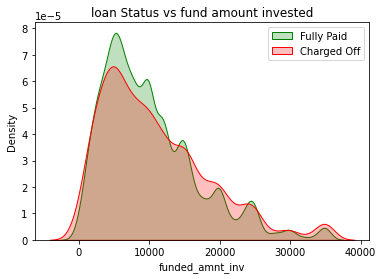

In [22]:
sns.kdeplot(data = loan[loan['loan_status'] == 'Fully Paid'], x = 'funded_amnt_inv', shade=True, color='green')
sns.kdeplot(data = loan[loan['loan_status'] == 'Charged Off'], x = 'funded_amnt_inv', shade = True, color='red')
plt.legend(['Fully Paid', 'Charged Off'])
plt.title('loan Status vs fund amount invested')
plt.show()

 - With increase in funding amount invested, there is a slight increase in density of people becoming -defaulter.

### Comparison of  Interest Rate and Grade vs loan status

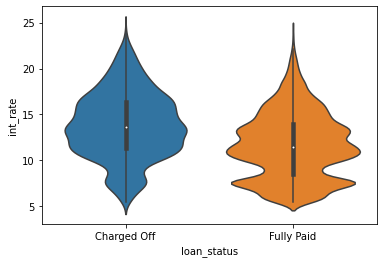

In [23]:
# interest rate Variation of loan vs loan status.
sns.violinplot(data = loan, x = 'loan_status', y = 'int_rate')
plt.show()

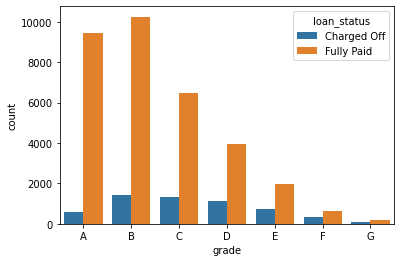

In [24]:
sns.countplot(data = loan, x = 'grade', hue = 'loan_status')
plt.show()

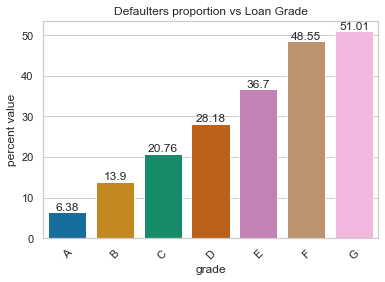

In [25]:
proportion_plot(loan, 'grade', 'Loan Grade')
plt.savefig('grade_vs_loan_status')

### Conclusion from above plots are:

- Lower the interest rate lower the number of defaulters.
- The number of defaulters started increasing from interest rate 12 to 13 percent .
- Around 50 percent of people defaulted against grade F and G.

### Comparision of employee work experience vs loan status

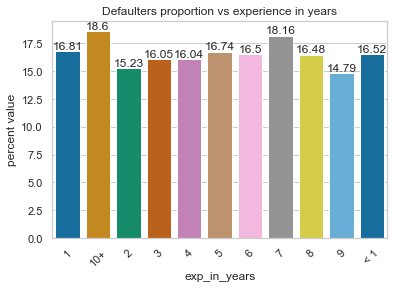

In [26]:
proportion_plot(loan[loan['exp_in_years'] != 'nan'],'exp_in_years', 'experience in years')
plt.savefig('exp_in_years')

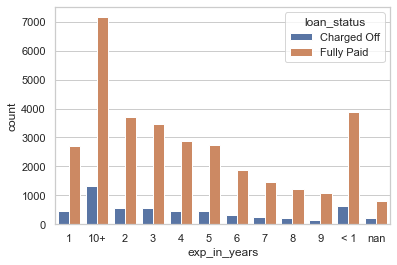

In [27]:
sns.countplot(data = loan, x = 'exp_in_years', hue = 'loan_status')
plt.show()

#### Conclusion of above plots are:

- There is not a single line judgement regarding relation of work experince vs loan defaulter. We have a bracket of one to ten years where people are less defaulter and people have less then one year of experince and more then ten years of experince are more prone to loan default. 

### Comparision of home ownership  vs loan status

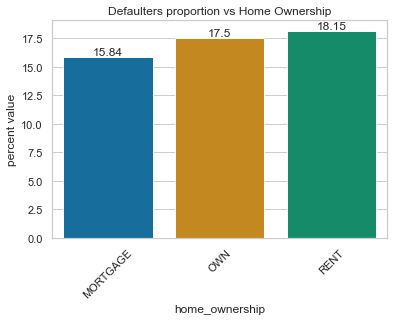

In [28]:
proportion_plot(loan[loan['home_ownership'].isin(['MORTGAGE', 'RENT', 'OWN'])], 'home_ownership', 'Home Ownership')
plt.savefig('home_ownership')

- As per above plot rented people are more prone to loan default than owner and mortgage are least prone to loan default.

### Comparision of loan application purpose vs loan status

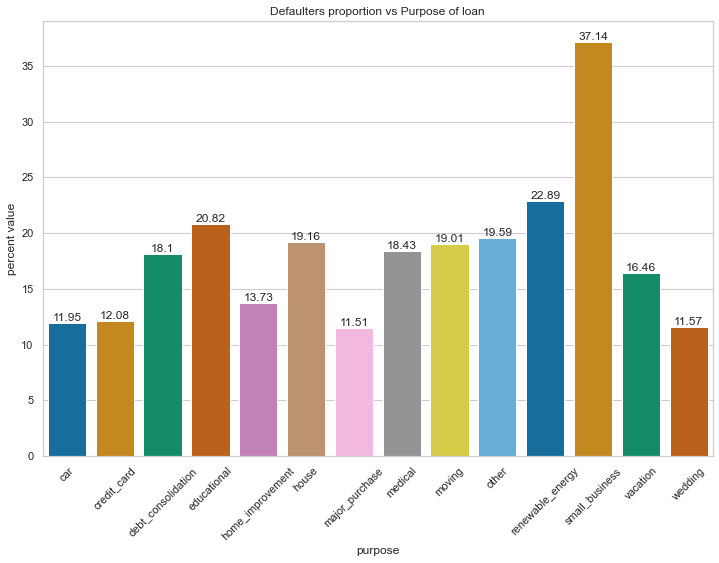

In [29]:
plt.figure(figsize=(12,8))
proportion_plot(loan, 'purpose', 'Purpose of loan')
plt.savefig('purpose')

- Loan taken for purpose of Small business have maximium number of defaulters (37.09%) thereafter renewable energy (22.89%) and then education (21.05%). People taking laon for car, credit card, major purchase and wedding show are showing least tendency to default loan.

### Comparision for state of customer vs loan status

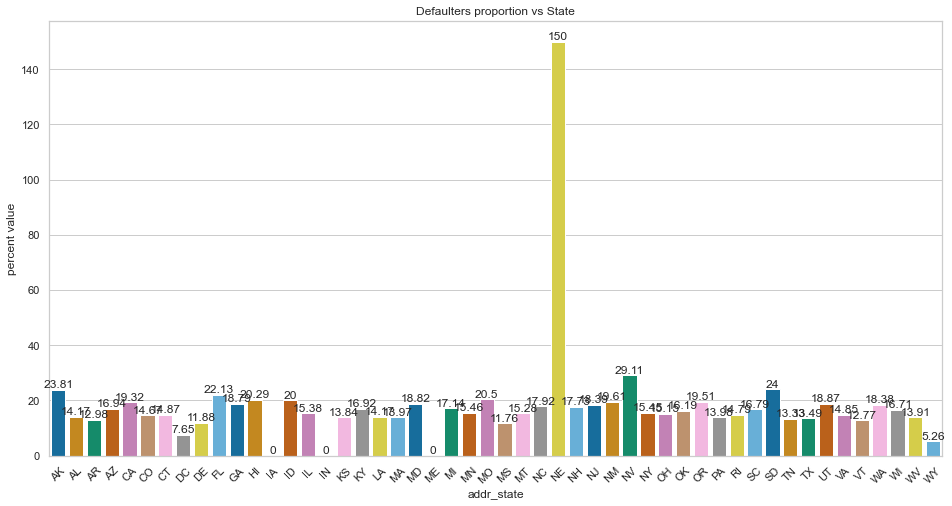

In [30]:
plt.figure(figsize=(16,8))
proportion_plot(loan, 'addr_state', 'State')

In [31]:
# As NE state has only 5 customers, the plot above does not seems correct.
# filtering all state where count is atleast 100.

state_count = pd.pivot_table(data=loan, index='addr_state', aggfunc='size')
state_count = pd.DataFrame(state_count)
state_count = state_count[state_count[0] >= 100]

In [32]:
state_above_100 = state_count.index.to_list()

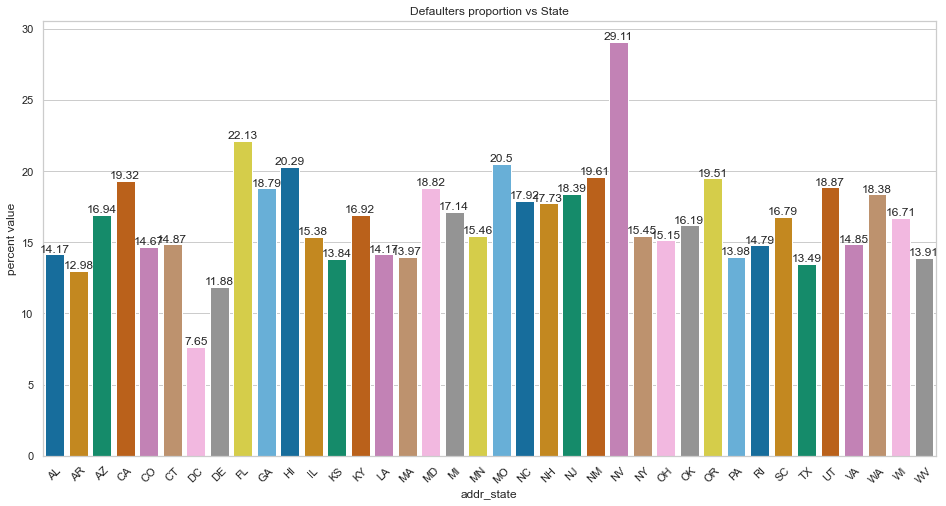

In [33]:
plt.figure(figsize=(16,8))
proportion_plot(loan[loan['addr_state'].isin(state_above_100)], 'addr_state', 'State')
plt.savefig('addr_state_prop')

- From above plot State Nevada(NV) have highest percentage of defaulters (29.19%), other states as Florida (22.09%), Hawaii(20.44%) and Missouri (20.32%) are also having major number of loan defaulters. State of Washington DC and State of Delaware shows minimum number of defaulters with 7.73% and 10.89% respectively.

### Comparison of delinquency record vs loan status

In [34]:
temp = pd.DataFrame()
no_past_delinq = loan[(loan['mths_since_last_delinq'].isna() & loan['mths_since_last_delinq'] == 0.0)]['loan_status']
no_past_delinq =((no_past_delinq == 'Charged Off').sum())/len(no_past_delinq)
temp['No_Reord'] = pd.Series(round(no_past_delinq*100, 2))

past_delinq = loan[~(loan['mths_since_last_delinq'].isna()) & loan['mths_since_last_delinq'] != 0.0]['loan_status']
past_delinq =((past_delinq == 'Charged Off').sum())/len(past_delinq)
temp['With_Reord'] = pd.Series(round(past_delinq*100, 2))
temp

,No_Reord,With_Reord
0,14.59,15.69


- Person with minimum one delinquency record have higher chance of defaulting.

### Comparison of total credit lines('total_acc') vs loan status

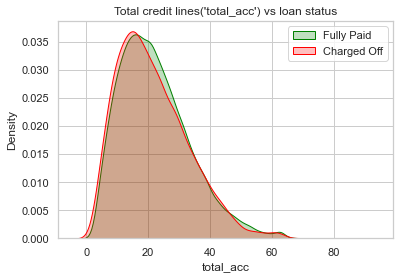

In [35]:
sns.kdeplot(data = loan[loan['loan_status'] == 'Fully Paid'], x = 'total_acc', shade=True, color='green')
sns.kdeplot(data = loan[loan['loan_status'] == 'Charged Off'], x = 'total_acc', shade = True, color='red')
plt.legend(['Fully Paid', 'Charged Off'])
plt.title("Total credit lines('total_acc') vs loan status")
plt.show()

- As per above plot credit lines('total_acc') is not sure sort variable to pridict weather loan applican would default or not as both of charged off and fully paid plots are almost congrent to each other.

### Comparison of employee salary vs loan status

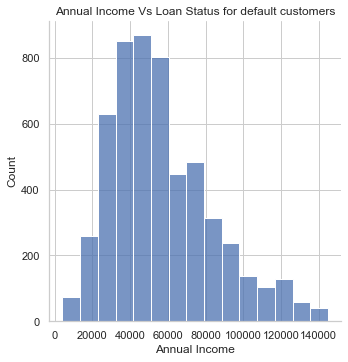

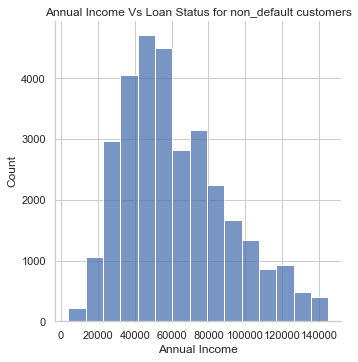

In [36]:
# Checking distribution of employee salary after removing outliers for each loan status category

# removing outliers for analysis (above 1.5 times of IQR + 75th percentile value)
income_iqr = np.percentile(loan['annual_inc'], 75) - np.percentile(loan['annual_inc'], 25)
#calculatin above limit for income
income_limit = np.percentile(loan['annual_inc'], 75) + 1.5*income_iqr

loan1 = loan[loan['annual_inc'] <= income_limit]
sns.displot(data = loan1[loan1['loan_status'] == 'Charged Off'], x = 'annual_inc', bins=15, )
plt.title('Annual Income Vs Loan Status for default customers')
plt.xlabel('Annual Income')
plt.savefig('income_c_vs_loan_status')
sns.displot(data = loan1[loan1['loan_status'] == 'Fully Paid'], x = 'annual_inc', bins=15, )
plt.title('Annual Income Vs Loan Status for non_default customers')
plt.xlabel('Annual Income')
plt.savefig('income_p_vs_loan_status')
plt.show()

- Income of person is independent variable. it has nothing to do with being a loan defaulter.

# 3.0 Univariate Analysis

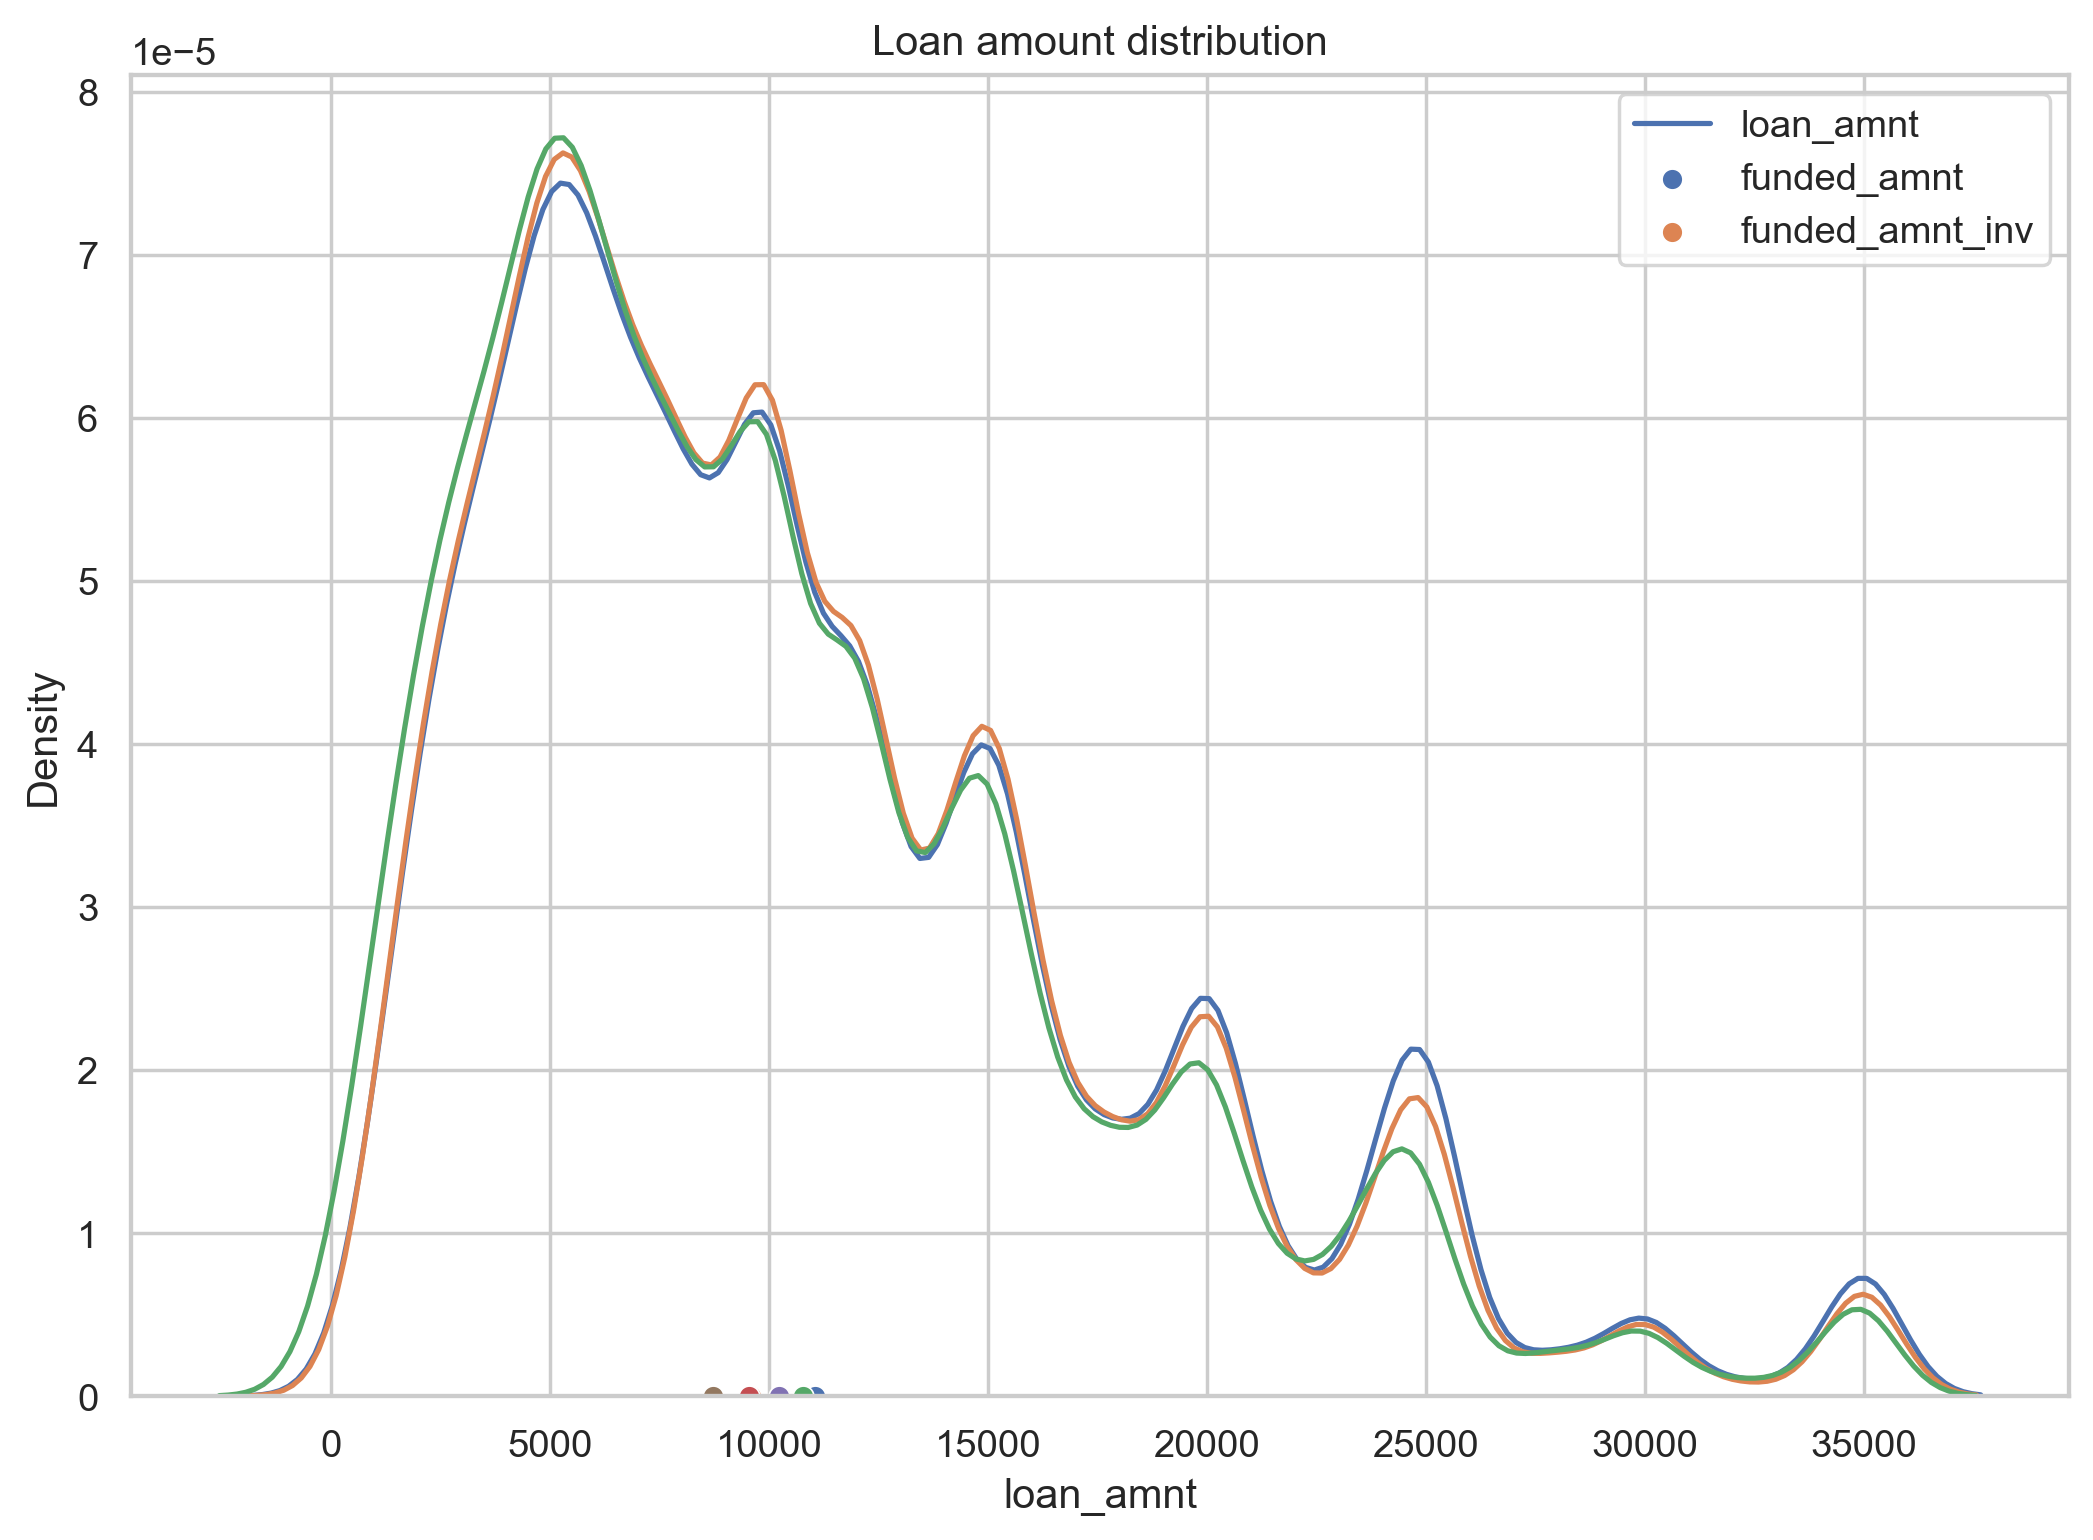

In [37]:
# checking distribution of loan_amnt, funded_amnt, funded_amnt_inv
funding_variable = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv']
plt.figure(figsize=(10,7), dpi = 250)
for i,j in enumerate(funding_variable):
    mean = loan[j].mean()
    median = loan[j].median()
    mini = np.min(loan[j])
    maxi = np.max(loan[j])
    
    #ax = plt.subplot(1,3,i+1)
    sns.kdeplot(loan[j])
    sns.scatterplot([mean],[0])
    sns.scatterplot([median],[0])
plt.title('Loan amount distribution')
plt.legend(funding_variable)
plt.savefig('loan_amt_distribution')
plt.show()

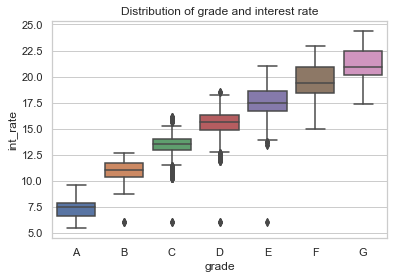

In [38]:
#interest rate distribution for different grades
sns.boxplot(data = loan, x = 'grade', y = 'int_rate')
plt.title('Distribution of grade and interest rate')
plt.savefig('Grade_Uni')
plt.show()

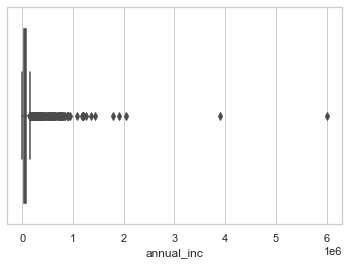

In [39]:
#Checking distribution of annual income of customers
sns.boxplot(loan['annual_inc'])
plt.show()

In [40]:
loan['annual_inc'].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

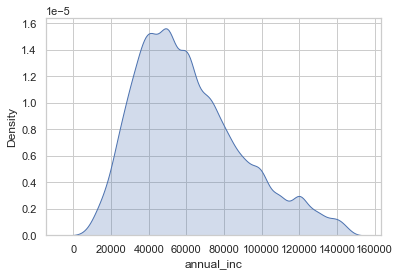

In [41]:
#distribution of income after removing outliers
sns.kdeplot(data = loan[loan['annual_inc'] <= income_limit], x = 'annual_inc', shade=True)
plt.show()

In [42]:
# numerical description of interest rate for all grades
grade_list =loan['grade'].unique().to_list()
grade_list.sort()
for grade in grade_list:
    print('Grade: ' + grade)
    print(loan[loan['grade'] == grade]['int_rate'].describe())
    print()

Grade: A
count    10045.000000
mean         7.330979
std          1.032009
min          5.420000
25%          6.620000
50%          7.490000
75%          7.900000
max          9.630000
Name: int_rate, dtype: float64

Grade: B
count    11675.000000
mean        11.007782
std          0.899383
min          6.000000
25%         10.370000
50%         10.990000
75%         11.710000
max         12.690000
Name: int_rate, dtype: float64

Grade: C
count    7834.000000
mean       13.533565
std         0.936284
min         6.000000
25%        12.990000
50%        13.490000
75%        13.990000
max        16.110000
Name: int_rate, dtype: float64

Grade: D
count    5085.000000
mean       15.661282
std         1.161512
min         6.000000
25%        14.910000
50%        15.620000
75%        16.320000
max        18.490000
Name: int_rate, dtype: float64

Grade: E
count    2663.000000
mean       17.630364
std         1.354736
min         6.000000
25%        16.690000
50%        17.510000
75%        18

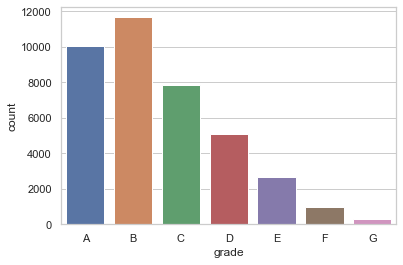

In [43]:
# Count of customers based on the rate of interest the loan has been disbursed.
sns.countplot(loan['grade'])
plt.show()

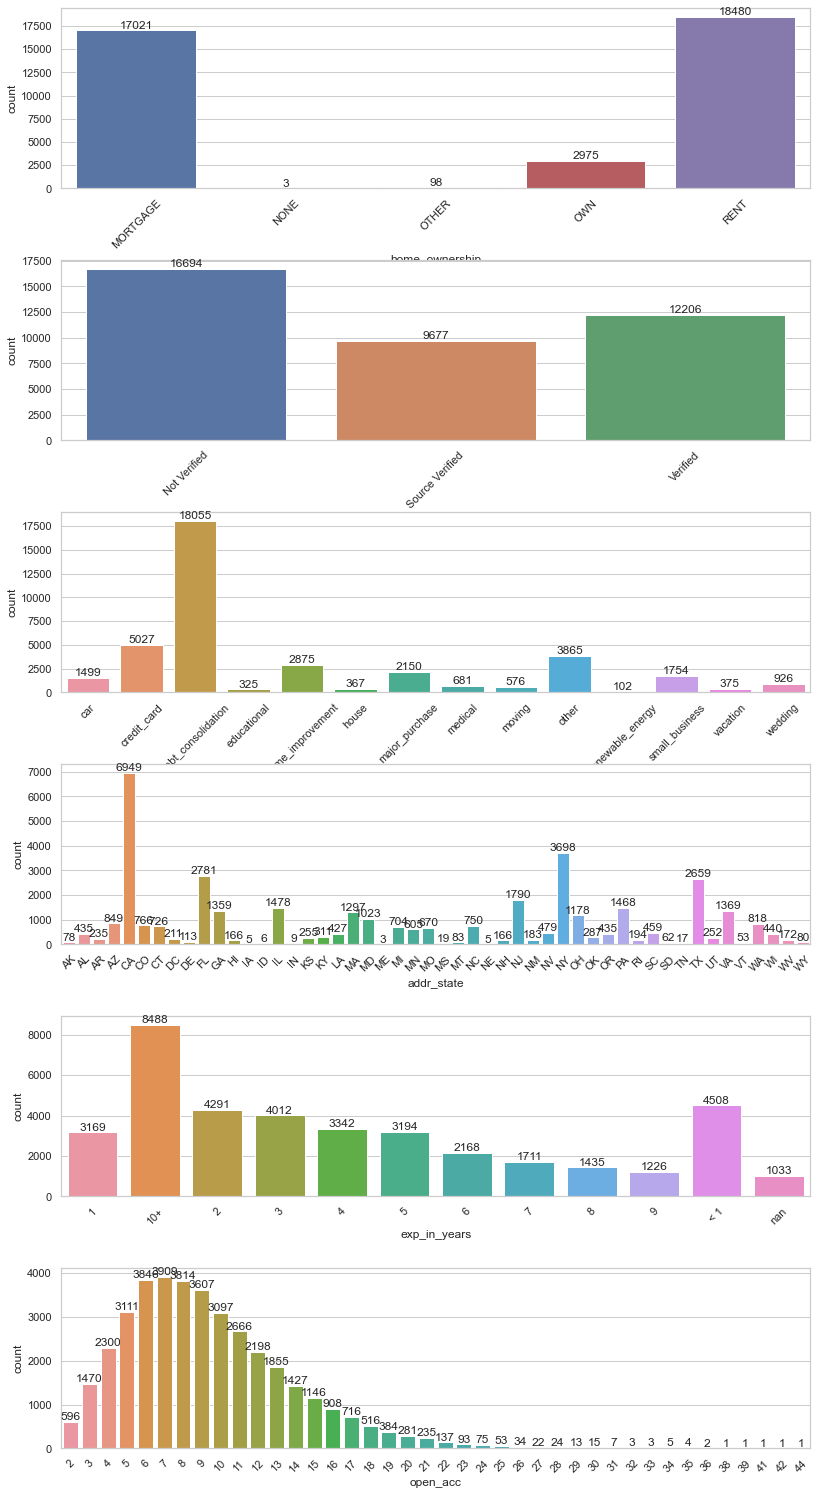

In [44]:
#identifying number of customers based on demography, home ownership, purpose of loan and verification status.
# These are the attributes of customer which are available before issuance of loan
attributes_col = ['home_ownership', 'verification_status', 'purpose', 'addr_state', 'exp_in_years', 'open_acc']
plt.figure(figsize=(13,20))
for i, attr in enumerate(attributes_col):
    ax = plt.subplot(6,1,i+1)
    sns.countplot(loan[attr])
    ax.bar_label(ax.containers[0])
    plt.xticks(rotation=45)
    plt.subplots_adjust(left=0.1,
                    bottom=0.2,  
                    top=1.2, 
                    wspace=0.4, 
                    hspace=0.4)
    plt.savefig(attr)
plt.show()

### Following things can be concluded form above plots:

- Most of loan applicants are either rented or mortaged.
- Maximum of loan application are for credit card payment and debt cansolidation.
- Home improvement and major purchages are other popular reasons of laon application.
- Most applicants are from California state and then New York and Texas.
- Majority of loan applicants are vastly expericneced professional, i.e. more than 10 years.
- Most people have multiple credit lines linked with them.